In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
file_path = r"C:\Users\Ivan\Documents\Data Analytics\Parte 5 Proyecto y Presentación\Sprint 10 Proyecto Final\MERCAMADRID\mercamadrid alt carne.xlsx"
df = pd.read_excel(file_path)
df.head()

fecha_desde fecha_hasta código_variedad descripción_variedad  origen  \
0  2024-01-01  2024-01-31         CA 0101         VACUNO CANAL  ESPAÑA   
1  2024-01-01  2024-01-31         CA 0101         VACUNO CANAL  ESPAÑA   
2  2024-01-01  2024-01-31         CA 0101         VACUNO CANAL  ESPAÑA   
3  2024-01-01  2024-01-31         CA 0101         VACUNO CANAL  ESPAÑA   
4  2024-01-01  2024-01-31         CA 0101         VACUNO CANAL  ESPAÑA   

      descripción_origen    kilos  precio_más_frecuente  precio_máximo  \
0   ALAVA                   45830                  5.90           5.91   
1   AVILA                   21140                  5.91           5.91   
2   BARCELONA              137340                  5.91           5.91   
3   BURGOS                  42456                  5.90           5.91   
4   CACERES               2230424                  5.90           5.91   

   precio_mínimo  var_precios  trimestre tipo_general nueva_categoria  \
0           5.89         0.02          1       VACUNO          VACUNO   
1           5.91         0.00          1       VACUNO          VACUNO   
2           5.90         0.01          1       VACUNO          VACUNO   
3           5.89         0.02          1       VACUNO          VACUNO   
4           5.89         0.02          1       VACUNO          VACUNO   

  categoria_general nacional_inter  
0             Carne         ESPAÑA  
1             Carne         ESPAÑA  
2             Carne         ESPAÑA  
3             Carne         ESPAÑA  
4             Carne         ESPAÑA

In [4]:
df["categoria_general"] = df["categoria_general"].replace("pescado", "Pescado")

In [5]:
from geopy.geocoders import Nominatim
import time

In [6]:
from geopy.geocoders import Nominatim
import time
import pandas as pd

# Inicializamos geopy con un user_agent "genérico"
geolocator = Nominatim(user_agent="my_user_agent")

def obtener_coordenadas(nombre_lugar):
    """
    Dado un nombre de lugar (provincia, ciudad o país),
    devuelve (lat, lon) priorizando España en caso de dudas,
    o (None, None) si no se encuentra.
    """
    # Quitar espacios extra y convertir a mayúsculas
    nombre_limpio = nombre_lugar.strip().upper()
    
    # Filtrar nombres como 'SIN ASIGNAR' o 'NACIONAL'
    if "SIN ASIGNAR" in nombre_limpio or "NACIONAL" in nombre_limpio:
        return (None, None)
    
    # Configurar la consulta
    query = nombre_lugar.title()  # Capitalizamos el lugar para el geocodificador
    
    try:
        # Consultar a Nominatim
        locations = geolocator.geocode(query, exactly_one=False, language='es')
        time.sleep(1)  # Para no saturar el servicio

        # Si se encuentran múltiples ubicaciones, priorizar las de España
        if locations:
            for location in locations:
                if "España" in location.address:
                    return (location.latitude, location.longitude)
            # Si ninguna ubicación es de España, tomar la primera
            return (locations[0].latitude, locations[0].longitude)
        else:
            return (None, None)
    except Exception as e:
        print(f"Error al procesar {nombre_lugar}: {e}")
        return (None, None)

# Procesar la lista de lugares
data = []
ciudades =[' ALAVA               ',
 ' AVILA               ',
 ' BARCELONA           ',
 ' BURGOS              ',
 ' CACERES             ',
 ' CORDOBA             ',
 ' LA CORUÑA           ',
 ' CUENCA              ',
 ' GERONA              ',
 ' GUADALAJARA         ',
 ' GUIPUZCOA           ',
 ' HUELVA              ',
 ' HUESCA              ',
 ' LEON                ',
 ' LERIDA              ',
 ' LUGO                ',
 ' MADRID              ',
 ' NAVARRA             ',
 ' ORENSE              ',
 ' ASTURIAS            ',
 ' PONTEVEDRA          ',
 ' SALAMANCA           ',
 ' CANTABRIA           ',
 ' SEGOVIA             ',
 ' SEVILLA             ',
 ' TOLEDO              ',
 ' VALENCIA            ',
 ' VALLADOLID          ',
 ' VIZCAYA             ',
 ' ZAMORA              ',
 ' ZARAGOZA            ',
 ' POLONIA             ',
 ' FRANCIA             ',
 ' ALEMANIA            ',
 ' ITALIA              ',
 ' BELGICA             ',
 ' HOLANDA             ',
 ' IRLANDA             ',
 ' PORTUGAL            ',
 ' DINAMARCA           ',
 ' AUSTRIA             ',
 ' CIUDAD REAL         ',
 ' MURCIA              ',
 ' NACIONAL SIN ASIGNAR',
 ' IMPORTACION SIN ASIG',
 ' BADAJOZ             ',
 ' SORIA               ',
 ' GRECIA              ',
 ' JAEN                ',
 ' LA RIOJA            ',
 ' PALENCIA            ',
 ' ALMERIA             ',
 ' MALAGA              ',
 ' ALICANTE            ',
 ' ALBACETE            ',
 ' CADIZ               ',
 ' TARRAGONA           ',
 ' GRANADA             ',
 ' GUATEMALA           ',
 ' REPUBLICA DOMINICANA',
 ' BRASIL              ',
 ' ISRAEL              ',
 ' MARRUECOS           ',
 ' SUDAFRICA           ',
 ' CHILE               ',
 ' MEJICO              ',
 ' CASTELLON           ',
 ' CHINA               ',
 ' ARGENTINA           ',
 ' COSTA DE MARFIL     ',
 ' PERU                ',
 ' TURQUIA             ',
 ' EGIPTO              ',
 ' ESTADOS UNIDOS      ',
 ' PANAMA              ',
 ' COSTA RICA          ',
 ' ANGOLA              ',
 ' LAS PALMAS          ',
 ' STA.CRUZ DE TENERIFE',
 ' COLOMBIA            ',
 ' ECUADOR             ',
 ' CAMERUN             ',
 ' MAURITANIA          ',
 ' HONDURAS            ',
 ' OTROS PAIS.AFRICANOS',
 ' NORUEGA             ',
 ' CANADA              ',
 ' GRAN BRETAÑA        ',
 ' SENEGAL             ',
 ' BULGARIA            ',
 ' TERUEL              ',
 ' INDIA               ',
 ' TAILANDIA           ',
 ' TÚNEZ               ',
 ' NUEVA ZELANDA       ',
 ' SUIZA               ',
 ' BALEARES            ',
 ' SUECIA              ',
 ' ISLANDIA            ',
 ' KENIA               ',
 ' RUMANÍA             ']

for lugar in ciudades:
    lat, lon = obtener_coordenadas(lugar)
    data.append({"lugar": lugar.strip(), "lat": lat, "lon": lon})

# Convertir a DataFrame
df_coordenadas = pd.DataFrame(data)

# Mostrar resultados
print(df_coordenadas)

         lugar        lat        lon
0        ALAVA  42.844072  -2.682083
1        AVILA  40.656478  -4.700217
2    BARCELONA  41.382894   2.177432
3       BURGOS  42.343926  -3.696977
4      CACERES  39.759173  -6.137946
..         ...        ...        ...
96    BALEARES  39.613432   2.882918
97      SUECIA  59.674971  14.520858
98    ISLANDIA  64.984182 -18.105901
99       KENIA   1.441968  38.431398
100    RUMANÍA  45.985213  24.685923

[101 rows x 3 columns]


In [7]:
import geopandas as gpd
from shapely.geometry import Point

# Creamos la geometría a partir de lat/lon
geometry = [
    Point(xy) if pd.notnull(xy[0]) and pd.notnull(xy[1]) else None
    for xy in zip(df_coordenadas["lon"], df_coordenadas["lat"])
]

gdf = gpd.GeoDataFrame(df_coordenadas, geometry=geometry)
# Asumimos coordenadas WGS84
gdf.set_crs(epsg=4326, inplace=True)

gdf.head()

lugar        lat       lon                   geometry
0      ALAVA  42.844072 -2.682083  POINT (-2.68208 42.84407)
1      AVILA  40.656478 -4.700217  POINT (-4.70022 40.65648)
2  BARCELONA  41.382894  2.177432   POINT (2.17743 41.38289)
3     BURGOS  42.343926 -3.696977  POINT (-3.69698 42.34393)
4    CACERES  39.759173 -6.137946  POINT (-6.13795 39.75917)

In [8]:
print(df_coordenadas[df_coordenadas['lat'] == None] )

Empty DataFrame
Columns: [lugar, lat, lon]
Index: []


In [9]:
df_coordenadas

lugar        lat        lon
0        ALAVA  42.844072  -2.682083
1        AVILA  40.656478  -4.700217
2    BARCELONA  41.382894   2.177432
3       BURGOS  42.343926  -3.696977
4      CACERES  39.759173  -6.137946
..         ...        ...        ...
96    BALEARES  39.613432   2.882918
97      SUECIA  59.674971  14.520858
98    ISLANDIA  64.984182 -18.105901
99       KENIA   1.441968  38.431398
100    RUMANÍA  45.985213  24.685923

[101 rows x 3 columns]

In [10]:
df['descripción_origen'] = df['descripción_origen'].str.strip().str.upper()
gdf['lugar'] = gdf['lugar'].str.strip().str.upper()

In [11]:
# Juntar la tabla df con el geodataframe
tabla = df.merge(gdf, left_on='descripción_origen', right_on='lugar')

In [12]:
def calcular_distancia(lat1, lon1, lat2, lon2):
    """
    Calcula la distancia entre dos coordenadas geográficas utilizando la fórmula Haversine.
    """
    # Convertir grados a radianes
    lat1, lon1, lat2, lon2 = map(np.radians, [lat1, lon1, lat2, lon2])
    
    # Diferencias
    dlat = lat2 - lat1
    dlon = lon2 - lon1
    
    # Fórmula Haversine
    a = np.sin(dlat / 2)**2 + np.cos(lat1) * np.cos(lat2) * np.sin(dlon / 2)**2
    c = 2 * np.arcsin(np.sqrt(a))
    
    # Radio de la Tierra en kilómetros
    r = 6371
    return c * r

# Coordenadas de Madrid
lat_madrid, lon_madrid = 40.4168, -3.7038

# Calcular distancia desde cada lugar hasta Madrid
tabla['distancia_madrid'] = tabla.apply(
    lambda row: calcular_distancia(row['lat'], row['lon'], lat_madrid, lon_madrid), axis=1)

In [13]:
tabla.head()

fecha_desde fecha_hasta código_variedad descripción_variedad  origen  \
0  2024-01-01  2024-01-31         CA 0101         VACUNO CANAL  ESPAÑA   
1  2024-01-01  2024-01-31         CA 0101         VACUNO CANAL  ESPAÑA   
2  2024-01-01  2024-01-31         CA 0101         VACUNO CANAL  ESPAÑA   
3  2024-01-01  2024-01-31         CA 0101         VACUNO CANAL  ESPAÑA   
4  2024-01-01  2024-01-31         CA 0101         VACUNO CANAL  ESPAÑA   

  descripción_origen    kilos  precio_más_frecuente  precio_máximo  \
0              ALAVA    45830                  5.90           5.91   
1              AVILA    21140                  5.91           5.91   
2          BARCELONA   137340                  5.91           5.91   
3             BURGOS    42456                  5.90           5.91   
4            CACERES  2230424                  5.90           5.91   

   precio_mínimo  ...  trimestre  tipo_general nueva_categoria  \
0           5.89  ...          1        VACUNO          VACUNO   
1           5.91  ...          1        VACUNO          VACUNO   
2           5.90  ...          1        VACUNO          VACUNO   
3           5.89  ...          1        VACUNO          VACUNO   
4           5.89  ...          1        VACUNO          VACUNO   

  categoria_general nacional_inter      lugar        lat       lon  \
0             Carne         ESPAÑA      ALAVA  42.844072 -2.682083   
1             Carne         ESPAÑA      AVILA  40.656478 -4.700217   
2             Carne         ESPAÑA  BARCELONA  41.382894  2.177432   
3             Carne         ESPAÑA     BURGOS  42.343926 -3.696977   
4             Carne         ESPAÑA    CACERES  39.759173 -6.137946   

                    geometry distancia_madrid  
0  POINT (-2.68208 42.84407)       282.937087  
1  POINT (-4.70022 40.65648)        88.320626  
2   POINT (2.17743 41.38289)       505.730367  
3  POINT (-3.69698 42.34393)       214.287390  
4  POINT (-6.13795 39.75917)       219.596515  

[5 rows x 21 columns]

In [14]:
# ELIMINAR IMPORTACIÖN Y NACIONAL SIN CIUDAD(En descripción_origen)
tabla['descripción_origen'].unique()

array(['ALAVA', 'AVILA', 'BARCELONA', 'BURGOS', 'CACERES', 'CORDOBA',
       'LA CORUÑA', 'CUENCA', 'GERONA', 'GUADALAJARA', 'GUIPUZCOA',
       'HUELVA', 'HUESCA', 'LEON', 'LERIDA', 'LUGO', 'MADRID', 'NAVARRA',
       'ORENSE', 'ASTURIAS', 'PONTEVEDRA', 'SALAMANCA', 'CANTABRIA',
       'SEGOVIA', 'SEVILLA', 'TOLEDO', 'VALENCIA', 'VALLADOLID',
       'VIZCAYA', 'ZAMORA', 'ZARAGOZA', 'POLONIA', 'FRANCIA', 'ALEMANIA',
       'ITALIA', 'BELGICA', 'HOLANDA', 'IRLANDA', 'PORTUGAL', 'DINAMARCA',
       'AUSTRIA', 'CIUDAD REAL', 'MURCIA', 'NACIONAL SIN ASIGNAR',
       'IMPORTACION SIN ASIG', 'BADAJOZ', 'SORIA', 'GRECIA', 'JAEN',
       'LA RIOJA', 'PALENCIA', 'ALMERIA', 'MALAGA', 'ALICANTE',
       'ALBACETE', 'CADIZ', 'TARRAGONA', 'GRANADA', 'GUATEMALA',
       'REPUBLICA DOMINICANA', 'BRASIL', 'ISRAEL', 'MARRUECOS',
       'SUDAFRICA', 'CHILE', 'MEJICO', 'CASTELLON', 'CHINA', 'ARGENTINA',
       'COSTA DE MARFIL', 'PERU', 'TURQUIA', 'EGIPTO', 'ESTADOS UNIDOS',
       'PANAMA', 'COSTA RICA'

In [15]:
# Calcular la media de distancia_madrid para los grupos nacionales e importados
media_nacional = tabla.loc[tabla["nacional_inter"] == "ESPAÑA", "distancia_madrid"].mean()
media_importacion = tabla.loc[tabla["nacional_inter"] == "RESTO", "distancia_madrid"].mean()

# Asignar la media correspondiente según la descripción de origen
tabla.loc[tabla["descripción_origen"] == "NACIONAL SIN ASIGNAR", "distancia_madrid"] = media_nacional
tabla.loc[tabla["descripción_origen"] == "IMPORTACIÓN SIN ASIGNAR", "distancia_madrid"] = media_importacion

In [16]:
# tabla.to_excel("DistanciaMadrid.xlsx", index=False, engine="openpyxl")

In [17]:
import plotly.express as px

# Filtrar datos para ESPAÑA y RESTO
df_espana = tabla[tabla["nacional_inter"] == "ESPAÑA"]
df_resto = tabla[tabla["nacional_inter"] == "RESTO"]

# Crear boxplot para ESPAÑA con la columna corregida
fig_espana = px.box(df_espana, x="distancia_madrid", hover_data=["descripción_origen"],
                    title="Distribución de Distancia a Madrid - ESPAÑA")
fig_espana.show()

# Crear boxplot para RESTO con la columna corregida
fig_resto = px.box(df_resto, x="distancia_madrid", hover_data=["descripción_origen"],
                   title="Distribución de Distancia a Madrid - RESTO")
fig_resto.show()

In [18]:
import plotly.express as px

# Filtrar datos por categoria_general
df_carne = tabla[tabla["categoria_general"] == "Carne"]
df_pescado = tabla[tabla["categoria_general"] == "Pescado"]
df_vegetales = tabla[tabla["categoria_general"] == "Vegetales"]

# Crear boxplot para Carne
fig_carne = px.box(df_carne, x="distancia_madrid", hover_data=["origen"],
                   title="Distribución de Distancia a Madrid - Carne")
fig_carne.show()

# Crear boxplot para Pescado
fig_pescado = px.box(df_pescado, x="distancia_madrid", hover_data=["origen"],
                     title="Distribución de Distancia a Madrid - Pescado")
fig_pescado.show()

# Crear boxplot para Vegetales
fig_vegetales = px.box(df_vegetales, x="distancia_madrid", hover_data=["origen"],
                       title="Distribución de Distancia a Madrid - Vegetales")
fig_vegetales.show()

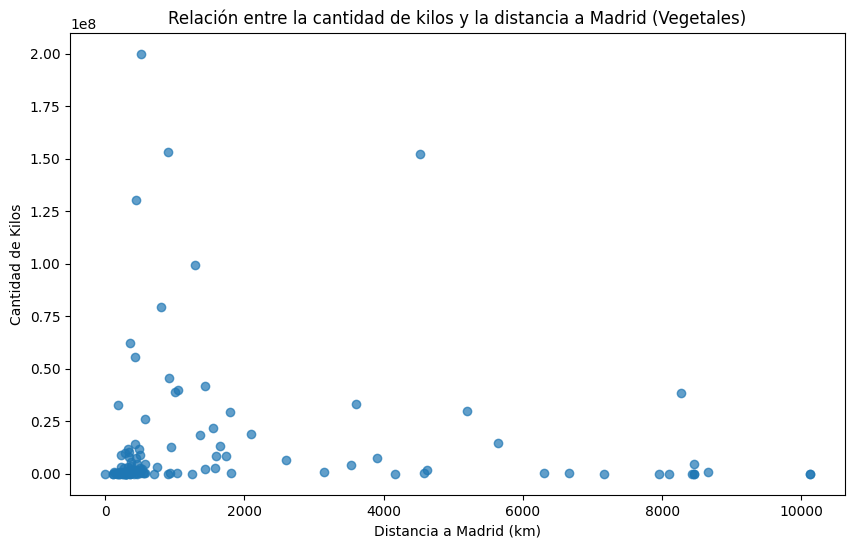

In [19]:
# Agrupar por 'nueva_categoria' y calcular el total de kilos y la media de distancia
df_vegetales_agg = df_vegetales.groupby("nueva_categoria", as_index=False).agg(
    {"kilos": "sum", "distancia_madrid": "mean"}
)

# Crear scatter plot
plt.figure(figsize=(10, 6))
plt.scatter(df_vegetales_agg["distancia_madrid"], df_vegetales_agg["kilos"], alpha=0.7)

# Etiquetas y título
plt.xlabel("Distancia a Madrid (km)")
plt.ylabel("Cantidad de Kilos")
plt.title("Relación entre la cantidad de kilos y la distancia a Madrid (Vegetales)")

# Mostrar gráfico
plt.show()

In [20]:
import plotly.express as px

# Crear scatter plot con Plotly
fig = px.scatter(df_vegetales_agg, x="distancia_madrid", y="kilos", 
                 hover_name="nueva_categoria",
                 title="Relación entre la cantidad de kilos y el promedio de distancia a Madrid por producto(Vegetales)",
                 labels={"distancia_madrid": "Distancia a Madrid (km)", "kilos": "Cantidad de Kilos"})

# Mostrar el gráfico interactivo
fig.show()

In [21]:
import plotly.express as px

# Agrupar por 'nueva_categoria' y 'nacional_inter', sumando kilos y promediando distancia
df_vegetales_agg_nac_imp = df_vegetales.groupby(["nueva_categoria", "nacional_inter"], as_index=False).agg(
    {"kilos": "sum", "distancia_madrid": "mean"}
)

# Crear scatter plot con Plotly diferenciando por origen (ESPAÑA vs RESTO)
fig = px.scatter(df_vegetales_agg_nac_imp, 
                 x="distancia_madrid", 
                 y="kilos", 
                 color="nacional_inter", 
                 hover_name="nueva_categoria",
                 title="Relación entre la cantidad de kilos y el promedio de distancia a Madrid por producto(Vegetales) para ESPAÑA(azul) y para IMPORTACIÓN(rojo)",
                 labels={"distancia_madrid": "Distancia a Madrid (km)", "kilos": "Cantidad de Kilos", "nacional_inter": "Origen"})

# Mostrar el gráfico interactivo
fig.show()
#

In [22]:
import plotly.express as px

# Lista de vegetales de interés
vegetales = ["MELONES", "MELOCOTON", "SANDIA", "PATATA", "NARANJAS", "MANZANAS", 
             "PERAS", "TOMATE", "PLATANOS", "KIWI", "PIMIENTO", "LECHUGAS", "CEBOLLA","PIÑA"]

# Filtrar el DataFrame para incluir solo 'nacional_inter = RESTO' y vegetales de la lista
df_filtrado = df_vegetales_agg_nac_imp[
    (df_vegetales_agg_nac_imp["nacional_inter"] == "RESTO") & 
    (df_vegetales_agg_nac_imp["nueva_categoria"].isin(vegetales))
]

# Crear scatter plot con Plotly
fig = px.scatter(df_filtrado, 
                 x="distancia_madrid", 
                 y="kilos", 
                 color="nueva_categoria",  # Diferenciar por tipo de vegetal
                 hover_name="nueva_categoria",
                 title="Relación entre la cantidad de kilos y el promedio de distancia a Madrid por producto (Vegetales IMPORTADOS)",
                 labels={"distancia_madrid": "Distancia a Madrid (km)", "kilos": "Cantidad de Kilos", "nueva_categoria": "Vegetal"})

# Mostrar el gráfico interactivo
fig.show()

In [36]:
# Filtrar el DataFrame para incluir solo 'nacional_inter = RESTO' y vegetales de la lista
df_filtrado = df_vegetales_agg_nac_imp[
    (df_vegetales_agg_nac_imp["nacional_inter"] == "RESTO") & 
    (df_vegetales_agg_nac_imp["nueva_categoria"].isin(vegetales))
]

# Crear scatter plot con Plotly
fig = px.scatter(df_filtrado, 
                 x="distancia_madrid", 
                 y="kilos", 
                 color="nueva_categoria",  # Diferenciar por tipo de vegetal
                 text="nueva_categoria",   # Asignar los nombres de los puntos
                 hover_name="nueva_categoria",
                 title="Relación entre la cantidad de kilos y el promedio de distancia a Madrid por producto (Vegetales IMPORTADOS)",
                 labels={"distancia_madrid": "Distancia a Madrid (km)", "kilos": "Cantidad de Kilos", "nueva_categoria": "Vegetal"})

# Ajustar la visualización de los textos en el gráfico
fig.update_traces(textposition='top center')  # Posición del texto (arriba del punto)

# Eliminar la leyenda
fig.update_layout(showlegend=False)

# Mostrar el gráfico interactivo
fig.show()

In [24]:
# Contar cuántas categorías aparecen en ambos grupos (ESPAÑA y RESTO)
categorias_ambos = df_vegetales_agg_nac_imp["nueva_categoria"].value_counts()
categorias_ambos = categorias_ambos[categorias_ambos == 2].index  # Filtrar las que aparecen dos veces (ESPAÑA y RESTO)

# Calcular el porcentaje
total_categorias = df_vegetales["nueva_categoria"].nunique()
porcentaje_ambos = (len(categorias_ambos) / total_categorias) * 100

# Imprimir el porcentaje
print(f"Porcentaje de categorías compradas tanto en ESPAÑA como en RESTO: {porcentaje_ambos:.2f}%")


Porcentaje de categorías compradas tanto en ESPAÑA como en RESTO: 56.90%


In [25]:
# Obtener categorías únicas en cada grupo
categorias_espana = set(df_vegetales_agg_nac_imp[df_vegetales_agg_nac_imp["nacional_inter"] == "ESPAÑA"]["nueva_categoria"])
categorias_resto = set(df_vegetales_agg_nac_imp[df_vegetales_agg_nac_imp["nacional_inter"] == "RESTO"]["nueva_categoria"])

# Categorías que solo aparecen en ESPAÑA
categorias_solo_espana = categorias_espana - categorias_resto

# Categorías que solo aparecen en RESTO
categorias_solo_resto = categorias_resto - categorias_espana

# Imprimir los resultados
print("Categorías solo en ESPAÑA:")
print(categorias_solo_espana)

print("\nCategorías solo en RESTO:")
print(categorias_solo_resto)

Categorías solo en ESPAÑA:
{'CHIRIMOYAS', 'BERENJENAS', 'BERROS', 'ACELGAS', 'CHIRIVIAS', 'PEPINO', 'CACAHUETE', 'MEMBRILLOS', 'NISPEROS', 'ZANAHORIAS', 'GUINDILLAS', 'ALMENDRA', 'KALE', 'ESCAROLAS', 'ESPINACAS', 'HIGOS', 'QUINTA', 'GROSELLA', 'ACHICORIA', 'GUISANTES', 'PAK', 'LAUREL', 'BORRAJAS', 'KUMKUAT', 'ACEITUNAS', 'ENDIVIA', 'CONSERVAS', 'SETA/HONGO', 'GRELOS', 'PARAGUAYAS', 'PEREJIL', 'CEBOLLINO', 'REMOLACHA', 'HINOJO', 'CARDOS', 'ALCACHOFAS', 'HABAS', 'PISTACHO'}

Categorías solo en RESTO:
{'CARAMBOLA', 'ZAPOTES', 'JENGIBRE', 'COCOS', 'YAME', 'GUANÁBANA', 'FRUTA', 'PIÑA', 'YUCA', 'LITCHIS', 'FISALIS', 'EDDO'}


In [26]:
# Calcular el porcentaje de categorías únicas en ESPAÑA y en RESTO
porcentaje_solo_espana = (len(categorias_solo_espana) / total_categorias) * 100
porcentaje_solo_resto = (len(categorias_solo_resto) / total_categorias) * 100

# Imprimir los resultados
print(f"Porcentaje de categorías solo en ESPAÑA: {porcentaje_solo_espana:.2f}%")
print(f"Porcentaje de categorías solo en RESTO: {porcentaje_solo_resto:.2f}%")

Porcentaje de categorías solo en ESPAÑA: 32.76%
Porcentaje de categorías solo en RESTO: 10.34%


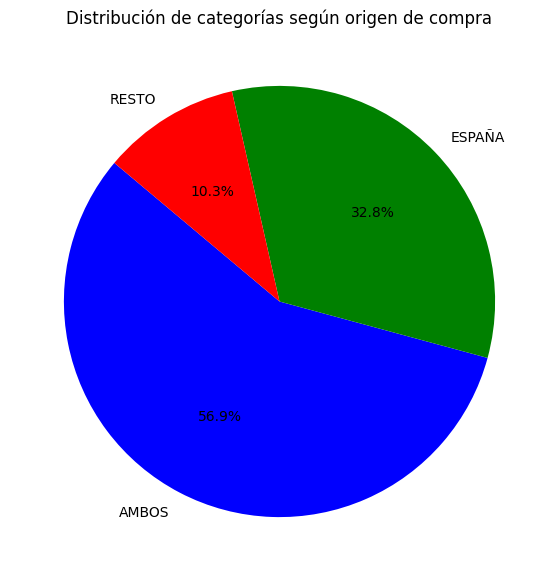

In [27]:
# Calcular los porcentajes de cada categoría
porcentaje_ambos = (len(categorias_ambos) / total_categorias) * 100
porcentaje_solo_espana = (len(categorias_solo_espana) / total_categorias) * 100
porcentaje_solo_resto = (len(categorias_solo_resto) / total_categorias) * 100

# Crear etiquetas y valores
etiquetas = ["AMBOS", "ESPAÑA", "RESTO"]
valores = [porcentaje_ambos, porcentaje_solo_espana, porcentaje_solo_resto]

# Crear el gráfico de pastel
plt.figure(figsize=(7, 7))
plt.pie(valores, labels=etiquetas, autopct="%1.1f%%", colors=["blue", "green", "red"], startangle=140)
plt.title("Distribución de categorías según origen de compra")

# Mostrar gráfico
plt.show()

In [28]:
# Calcular la distancia media de ESPAÑA y RESTO
media_distancia_espana = df_vegetales_agg_nac_imp[df_vegetales_agg_nac_imp["nacional_inter"] == "ESPAÑA"]["distancia_madrid"].mean()
media_distancia_resto = df_vegetales_agg_nac_imp[df_vegetales_agg_nac_imp["nacional_inter"] == "RESTO"]["distancia_madrid"].mean()

# Calcular el incremento absoluto y porcentual
incremento_absoluto = media_distancia_resto - media_distancia_espana
incremento_porcentual = (incremento_absoluto / media_distancia_espana) * 100

# Imprimir los resultados
print(f"Incremento absoluto de distancia en RESTO respecto a ESPAÑA: {incremento_absoluto:.2f} km")
print(f"Incremento porcentual de distancia en RESTO respecto a ESPAÑA: {incremento_porcentual:.2f}%")

Incremento absoluto de distancia en RESTO respecto a ESPAÑA: 4359.85 km
Incremento porcentual de distancia en RESTO respecto a ESPAÑA: 1377.61%


In [29]:
# Calcular la distancia media ponderada por kilos para ESPAÑA y RESTO
media_pond_distancia_espana = (df_vegetales_agg_nac_imp[df_vegetales_agg_nac_imp["nacional_inter"] == "ESPAÑA"]
                               .apply(lambda x: x["distancia_madrid"] * x["kilos"], axis=1).sum() / 
                               df_vegetales_agg_nac_imp[df_vegetales_agg_nac_imp["nacional_inter"] == "ESPAÑA"]["kilos"].sum())

media_pond_distancia_resto = (df_vegetales_agg_nac_imp[df_vegetales_agg_nac_imp["nacional_inter"] == "RESTO"]
                              .apply(lambda x: x["distancia_madrid"] * x["kilos"], axis=1).sum() / 
                              df_vegetales_agg_nac_imp[df_vegetales_agg_nac_imp["nacional_inter"] == "RESTO"]["kilos"].sum())

# Calcular el incremento absoluto y porcentual considerando la ponderación por kilos
incremento_absoluto_pond = media_pond_distancia_resto - media_pond_distancia_espana
incremento_porcentual_pond = (incremento_absoluto_pond / media_pond_distancia_espana) * 100

# Imprimir los resultados
print(f"Incremento absoluto ponderado por kilos en RESTO respecto a ESPAÑA: {incremento_absoluto_pond:.2f} km")
print(f"Incremento porcentual ponderado por kilos en RESTO respecto a ESPAÑA: {incremento_porcentual_pond:.2f}%")

Incremento absoluto ponderado por kilos en RESTO respecto a ESPAÑA: 4295.11 km
Incremento porcentual ponderado por kilos en RESTO respecto a ESPAÑA: 1060.55%


 # CON TODOS LOS PRODUCTOS

In [30]:
# Lista de vegetales en mayúsculas
vegetales = ["MELONES", "MELOCOTON", "SANDIA", "PATATA", "NARANJAS", "MANZANAS", 
             "PERAS", "TOMATE", "PLATANOS", "KIWI", "PIMIENTO", "LECHUGAS", "CEBOLLA"]

# Lista para almacenar los resultados
resultados = []

# Loop para calcular los valores para cada vegetal
for vegetal in vegetales:
    
    # Filtrar datos de ESPAÑA y RESTO directamente
    df_veg = tabla[tabla["nueva_categoria"] == vegetal]
    espana_data = df_veg[df_veg["nacional_inter"] == "ESPAÑA"]
    resto_data = df_veg[df_veg["nacional_inter"] == "RESTO"]

    # Sumar kilos para cada categoría
    kilos_espana = espana_data["kilos"].sum()
    kilos_resto = resto_data["kilos"].sum()

    # Calcular distancia media ponderada solo si kilos > 0
    media_pond_distancia_espana = (
        int(round((espana_data["distancia_madrid"] * espana_data["kilos"]).sum() / kilos_espana, 0))
        if kilos_espana > 0 else None
    )

    media_pond_distancia_resto = (
        int(round((resto_data["distancia_madrid"] * resto_data["kilos"]).sum() / kilos_resto, 0))
        if kilos_resto > 0 else None
    )

    # Calcular incrementos absoluto y porcentual solo si hay valores válidos
    if media_pond_distancia_espana is not None and media_pond_distancia_resto is not None:
        incremento_absoluto_pond = int(round(media_pond_distancia_resto - media_pond_distancia_espana, 0))
        incremento_porcentual_pond = int(round((incremento_absoluto_pond / media_pond_distancia_espana) * 100, 0))
    else:
        incremento_absoluto_pond = None
        incremento_porcentual_pond = None

    # Guardar resultados en la lista
    resultados.append({
        "Vegetal": vegetal,
        "Distancia Media ESPAÑA (km)": media_pond_distancia_espana,
        "Distancia Media RESTO (km)": media_pond_distancia_resto,
        "Incremento Absoluto (km)": incremento_absoluto_pond,
        "Incremento Porcentual (%)": incremento_porcentual_pond
    })

# Convertir la lista en un DataFrame
df_resultados = pd.DataFrame(resultados)

# Mostrar los resultados
import IPython.display as display
display.display(df_resultados)

Vegetal  Distancia Media ESPAÑA (km)  Distancia Media RESTO (km)  \
0     MELONES                          323                        6747   
1   MELOCOTON                          337                        2678   
2      SANDIA                          342                        2958   
3      PATATA                          181                        1179   
4    NARANJAS                          328                        6038   
5    MANZANAS                          351                        2418   
6       PERAS                          330                        2583   
7      TOMATE                          382                         896   
8    PLATANOS                         1758                        5715   
9        KIWI                          448                        8380   
10   PIMIENTO                          378                        1450   
11   LECHUGAS                          316                         411   
12    CEBOLLA                          138                        3921   

    Incremento Absoluto (km)  Incremento Porcentual (%)  
0                       6424                       1989  
1                       2341                        695  
2                       2616                        765  
3                        998                        551  
4                       5710                       1741  
5                       2067                        589  
6                       2253                        683  
7                        514                        135  
8                       3957                        225  
9                       7932                       1771  
10                      1072                        284  
11                        95                         30  
12                      3783                       2741

In [35]:
# Lista de vegetales en mayúsculas
vegetales = ["MELONES", "MELOCOTON", "SANDIA", "PATATA", "NARANJAS", "MANZANAS", 
             "PERAS", "TOMATE", "PLATANOS", "KIWI", "PIMIENTO", "LECHUGAS", "CEBOLLA"]

# Lista para almacenar los resultados
resultados = []

# Loop para calcular los valores para cada vegetal
for vegetal in vegetales:
    
    # Filtrar datos de ESPAÑA y RESTO directamente
    df_veg = tabla[tabla["nueva_categoria"] == vegetal]
    espana_data = df_veg[df_veg["nacional_inter"] == "ESPAÑA"]
    resto_data = df_veg[df_veg["nacional_inter"] == "RESTO"]

    # Sumar kilos para cada categoría
    kilos_espana = espana_data["kilos"].sum()
    kilos_resto = resto_data["kilos"].sum()

    # Calcular distancia media ponderada solo si kilos > 0
    media_pond_distancia_espana = (
        int(round((espana_data["distancia_madrid"] * espana_data["kilos"]).sum() / kilos_espana, 0))
        if kilos_espana > 0 else None
    )

    media_pond_distancia_resto = (
        int(round((resto_data["distancia_madrid"] * resto_data["kilos"]).sum() / kilos_resto, 0))
        if kilos_resto > 0 else None
    )

    # Calcular incrementos absoluto y porcentual solo si hay valores válidos
    if media_pond_distancia_espana is not None and media_pond_distancia_resto is not None:
        incremento_absoluto_pond = int(round(media_pond_distancia_resto - media_pond_distancia_espana, 0))
        incremento_porcentual_pond = int(round((incremento_absoluto_pond / media_pond_distancia_espana) * 100, 0))
    else:
        incremento_absoluto_pond = None
        incremento_porcentual_pond = None

    # Guardar resultados en la lista
    resultados.append({
        "Vegetal": vegetal,
        "Distancia Media ESPAÑA (km)": media_pond_distancia_espana,
        "Distancia Media RESTO (km)": media_pond_distancia_resto,
        "Incremento Absoluto (km)": incremento_absoluto_pond,
        "Incremento Porcentual (%)": incremento_porcentual_pond,
        "Kilos ESPAÑA": kilos_espana,  # Agregar suma de kilos de ESPAÑA
        "Kilos RESTO": kilos_resto     # Agregar suma de kilos de RESTO
    })

# Convertir la lista en un DataFrame
df_resultados = pd.DataFrame(resultados)

# Mostrar los resultados
import IPython.display as display
display.display(df_resultados)

Vegetal  Distancia Media ESPAÑA (km)  Distancia Media RESTO (km)  \
0     MELONES                          323                        6747   
1   MELOCOTON                          337                        2678   
2      SANDIA                          342                        2958   
3      PATATA                          181                        1179   
4    NARANJAS                          328                        6038   
5    MANZANAS                          351                        2418   
6       PERAS                          330                        2583   
7      TOMATE                          382                         896   
8    PLATANOS                         1758                        5715   
9        KIWI                          448                        8380   
10   PIMIENTO                          378                        1450   
11   LECHUGAS                          316                         411   
12    CEBOLLA                          138                        3921   

    Incremento Absoluto (km)  Incremento Porcentual (%)  Kilos ESPAÑA  \
0                       6424                       1989      27289602   
1                       2341                        695      35085327   
2                       2616                        765      34399950   
3                        998                        551     155368003   
4                       5710                       1741     135652583   
5                       2067                        589      66939181   
6                       2253                        683      35993379   
7                        514                        135     106243325   
8                       3957                        225      97896797   
9                       7932                       1771       3363110   
10                      1072                        284      52973347   
11                        95                         30      56258869   
12                      3783                       2741      77006534   

    Kilos RESTO  
0      12329623  
1       3623965  
2       7454354  
3      44555676  
4      17606961  
5      32238107  
6       9601456  
7      23944615  
8      54061518  
9      29650372  
10      2658924  
11      6111578  
12      2417337

In [40]:
# Filtrar el DataFrame para incluir solo 'nacional_inter = RESTO' y vegetales de la lista
df_filtrado = df_vegetales_agg_nac_imp[
    (df_vegetales_agg_nac_imp["nacional_inter"] == "RESTO") & 
    (df_vegetales_agg_nac_imp["nueva_categoria"].isin(vegetales))
]

# Crear scatter plot con Plotly
fig = px.scatter(df_resultados, 
                 x="Distancia Media RESTO (km)", 
                 y="Kilos RESTO", 
                 color="Vegetal",  # Diferenciar por tipo de vegetal
                 text="Vegetal",   # Asignar los nombres de los puntos
                 hover_name="Vegetal",
                 title="Relación entre la cantidad de kilos y el promedio de distancia a Madrid por producto (Vegetales IMPORTADOS)")
                 #,labels={"distancia_madrid": "Distancia a Madrid (km)", "kilos": "Cantidad de Kilos", "nueva_categoria": "Vegetal"})

# Ajustar la visualización de los textos en el gráfico
fig.update_traces(textposition='top center')  # Posición del texto (arriba del punto)

# Eliminar la leyenda
fig.update_layout(showlegend=False)

# Mostrar el gráfico interactivo
fig.show()

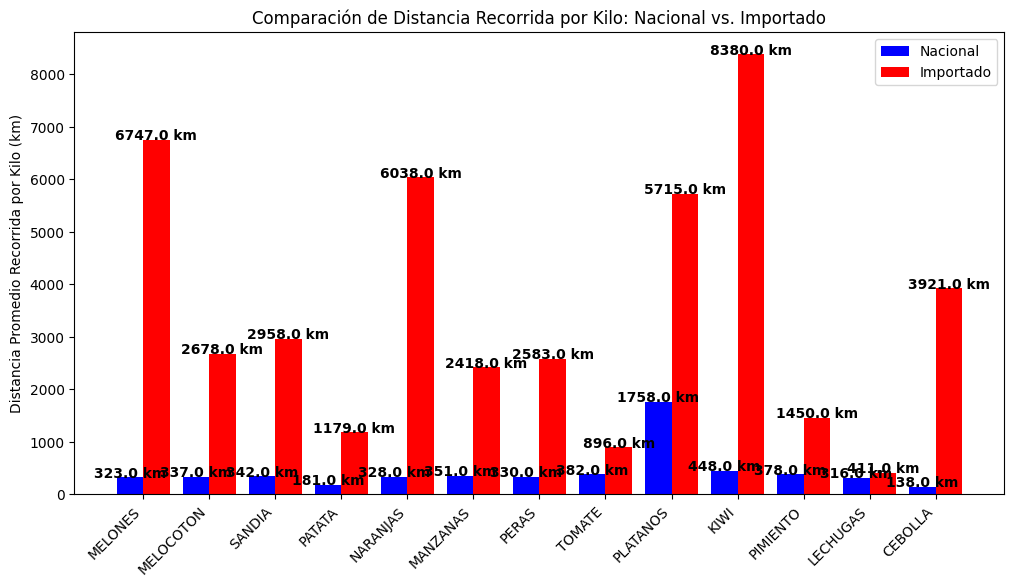

In [31]:
# Filtrar los valores necesarios
alimentos = df_resultados["Vegetal"]
distancia_espana = df_resultados["Distancia Media ESPAÑA (km)"]
distancia_resto = df_resultados["Distancia Media RESTO (km)"]

# Crear el gráfico de barras comparativo
plt.figure(figsize=(12, 6))
x = range(len(alimentos))

plt.bar(x, distancia_espana, width=0.4, label="Nacional", color="blue", align="center")
plt.bar([i + 0.4 for i in x], distancia_resto, width=0.4, label="Importado", color="red", align="center")

# Configurar etiquetas y títulos
plt.xticks([i + 0.2 for i in x], alimentos, rotation=45, ha="right")
plt.ylabel("Distancia Promedio Recorrida por Kilo (km)")
plt.title("Comparación de Distancia Recorrida por Kilo: Nacional vs. Importado")
plt.legend()

# Añadir etiquetas con los valores
for i, (v1, v2) in enumerate(zip(distancia_espana, distancia_resto)):
    plt.text(i, v1 + 5, f"{v1:.1f} km", ha="center", fontsize=10, fontweight="bold", color="black")
    plt.text(i + 0.4, v2 + 5, f"{v2:.1f} km", ha="center", fontsize=10, fontweight="bold", color="black")

# Mostrar gráfico
plt.show()


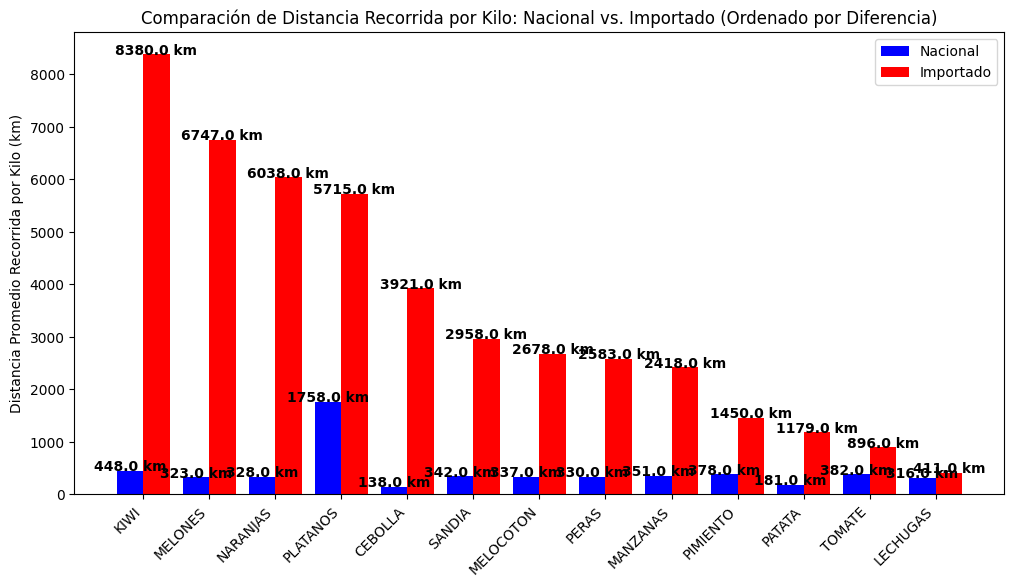

In [32]:
import matplotlib.pyplot as plt

# Calcular la diferencia absoluta entre distancias de importado y nacional
df_resultados["Diferencia Absoluta"] = abs(df_resultados["Distancia Media RESTO (km)"] - df_resultados["Distancia Media ESPAÑA (km)"])

# Ordenar el DataFrame por la diferencia absoluta en orden descendente
df_resultados_ordenado = df_resultados.sort_values(by="Diferencia Absoluta", ascending=False)

# Extraer los valores ordenados
alimentos = df_resultados_ordenado["Vegetal"]
distancia_espana = df_resultados_ordenado["Distancia Media ESPAÑA (km)"]
distancia_resto = df_resultados_ordenado["Distancia Media RESTO (km)"]

# Crear el gráfico de barras comparativo
plt.figure(figsize=(12, 6))
x = range(len(alimentos))

plt.bar(x, distancia_espana, width=0.4, label="Nacional", color="blue", align="center")
plt.bar([i + 0.4 for i in x], distancia_resto, width=0.4, label="Importado", color="red", align="center")

# Configurar etiquetas y títulos
plt.xticks([i + 0.2 for i in x], alimentos, rotation=45, ha="right")
plt.ylabel("Distancia Promedio Recorrida por Kilo (km)")
plt.title("Comparación de Distancia Recorrida por Kilo: Nacional vs. Importado (Ordenado por Diferencia)")
plt.legend()

# Añadir etiquetas con los valores
for i, (v1, v2) in enumerate(zip(distancia_espana, distancia_resto)):
    plt.text(i, v1 + 5, f"{v1:.1f} km", ha="center", fontsize=10, fontweight="bold", color="black")
    plt.text(i + 0.4, v2 + 5, f"{v2:.1f} km", ha="center", fontsize=10, fontweight="bold", color="black")

# Mostrar gráfico
plt.show()


# SORPRENDE QUE SEA PRACTICAMENTE IGUAL

# INTENTO DETECTAR CONTINENTE

In [33]:
# Diccionario de mapeo de países a continentes con América unificada
mapa_continentes = {
    "ESPAÑA": "Europa",
    "POLONIA": "Europa",
    "FRANCIA": "Europa",
    "ALEMANIA": "Europa",
    "ITALIA": "Europa",
    "BELGICA": "Europa",
    "HOLANDA": "Europa",
    "IRLANDA": "Europa",
    "PORTUGAL": "Europa",
    "DINAMARCA": "Europa",
    "AUSTRIA": "Europa",
    "GRECIA": "Europa",
    "BULGARIA": "Europa",
    "RUMANÍA": "Europa",
    "SUIZA": "Europa",
    "SUECIA": "Europa",
    "ISLANDIA": "Europa",
    "GRAN BRETAÑA": "Europa",
    "NORUEGA": "Europa",

    "BRASIL": "América",
    "ARGENTINA": "América",
    "CHILE": "América",
    "COLOMBIA": "América",
    "ECUADOR": "América",
    "PERU": "América",
    "COSTA RICA": "América",
    "COSTA DE MARFIL": "África",
    "GUATEMALA": "América",
    "HONDURAS": "América",
    "MEXICO": "América",
    "MEJICO": "América",  # Corrigiendo la variante de escritura
    "PANAMA": "América",
    "REPUBLICA DOMINICANA": "América",
    "ESTADOS UNIDOS": "América",
    "CANADA": "América",

    "ISRAEL": "Asia",
    "CHINA": "Asia",
    "INDIA": "Asia",
    "TAILANDIA": "Asia",
    "TURQUIA": "Asia",

    "MARRUECOS": "África",
    "SUDAFRICA": "África",
    "SENEGAL": "África",
    "EGIPTO": "África",
    "CAMERUN": "África",
    "MAURITANIA": "África",
    "ANGOLA": "África",
    "KENIA": "África",
    "TÚNEZ": "África",
    "OTROS PAIS.AFRICANOS": "África",

    "NUEVA ZELANDA": "Oceanía",
    
    "IMPORTACION SIN ASIG": "Desconocido",  # Categoría no asignada
    "TERUEL": "España"  # Posible error en los datos, se mantiene en España
}

# Asignar continente a cada fila en la tabla
tabla["continente"] = tabla["origen"].map(mapa_continentes).fillna("Desconocido")

# Mostrar los primeros resultados
print(tabla[["origen", "continente"]].head())

   origen continente
0  ESPAÑA     Europa
1  ESPAÑA     Europa
2  ESPAÑA     Europa
3  ESPAÑA     Europa
4  ESPAÑA     Europa
